In [32]:
%matplotlib inline

import xarray as xr
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
from matplotlib import axes
import matplotlib.colors as colors
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cmocean import cm
os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/shkifmjr/cartopy_images/'

import warnings
warnings.simplefilter('ignore')

#### Define paths to data

In [2]:
path='/scratch/usr/shklvn09/SCRATCH/ORCA025.L46.LIM2vp.CFCSF6.MOPS.JRA.LP04-KLP002.hind/OUT/'

In [36]:
mask = xr.open_dataset('/scratch/usr/shkifmmp/MOC/ORCA025/hind/MOC/mask.nc').tmask.isel(z=0).squeeze()

In [37]:
mask

<xarray.DataArray 'tmask' (y: 1021, x: 1442)>
[1472282 values with dtype=int8]
Dimensions without coordinates: y, x

In [33]:
img = plt.imread('/home/shkifmjr/cartopy_images/BlueMarble_TOPO_010_FEB.png')

#### ORCA05

In [38]:
# simulated variables

co2flux_pre = xr.open_mfdataset(paths = sorted(glob(path + 'OR*1m*2018*_mops.nc')), 
                                  chunks={"time_counter":1, "y":100, "x":100}).co2flux_pre.where(mask)


#co2flux_tot = xr.open_mfdataset(paths = sorted(glob(path + 'OR*1m*_mops.nc')), 
#                                  chunks={"time_counter":1, "y":100, "x":100}).co2flux


In [16]:
co2flux_pre

<xarray.DataArray 'co2flux_pre' (time_counter: 12, y: 1021, x: 1442)>
dask.array<open_dataset-c974c1c9575a21bf3828fd162f308189co2flux_pre, shape=(12, 1021, 1442), dtype=float32, chunksize=(1, 100, 100), chunktype=numpy.ndarray>
Coordinates:
    nav_lat        (y, x) float32 dask.array<chunksize=(100, 100), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(100, 100), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2018-01-16T12:00:00 ... 2018...
Dimensions without coordinates: y, x
Attributes:
    long_name:           pre-ind air-sea CO2 flux (pos downwards)
    units:               mol/m2/year
    online_operation:    average
    interval_operation:  1350 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 1350 s)

In [8]:

#lon = xr.open_mfdataset(paths = sorted(glob(path + 'OR*_kw.nc')), 
#                                  chunks={"time_counter":1, "y":100, "x":100}).nav_lon
#lat = xr.open_mfdataset(paths = sorted(glob(path + 'OR*_kw.nc')), 
 #                                 chunks={"time_counter":1, "y":100, "x":100}).nav_lat

In [23]:
#lat

<xarray.DataArray 'nav_lat' (y: 511, x: 722)>
dask.array<open_dataset-99e9c8e6689d719c86e69539f705c642nav_lat, shape=(511, 722), dtype=float32, chunksize=(100, 100), chunktype=numpy.ndarray>
Coordinates:
    nav_lat  (y, x) float32 dask.array<chunksize=(100, 100), meta=np.ndarray>
    nav_lon  (y, x) float32 dask.array<chunksize=(100, 100), meta=np.ndarray>
Dimensions without coordinates: y, x
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north

In [39]:
# shift coordinates so that they monotonically increasing
co2flux_pre.coords["x"], co2flux_pre.coords["y"] = range(len(co2flux_pre.x)), range(len(co2flux_pre.y))
after_discont = ~(co2flux_pre.coords["nav_lon"].diff("x", label="upper") > 0).cumprod("x").astype(bool)

co2flux_pre.coords["nav_lon"] = (
    co2flux_pre.coords["nav_lon"]
    + 360 * after_discont)

co2flux_pre = co2flux_pre.isel(y=slice(1,None), x=slice(1,None))

In [15]:
co2flux_pre

<xarray.DataArray 'co2flux_pre' (time_counter: 12, y: 1020, x: 1441)>
dask.array<getitem, shape=(12, 1020, 1441), dtype=float32, chunksize=(1, 100, 100), chunktype=numpy.ndarray>
Coordinates:
    nav_lat        (y, x) float32 -76.95 -76.95 -76.95 ... 50.02 50.0 50.0
    nav_lon        (y, x) float64 dask.array<chunksize=(99, 99), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2018-01-16T12:00:00 ... 2018...
  * x              (x) int64 1 2 3 4 5 6 7 ... 1436 1437 1438 1439 1440 1441
  * y              (y) int64 1 2 3 4 5 6 7 ... 1015 1016 1017 1018 1019 1020
Attributes:
    long_name:           pre-ind air-sea CO2 flux (pos downwards)
    units:               mol/m2/year
    online_operation:    average
    interval_operation:  1350 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 1350 s)

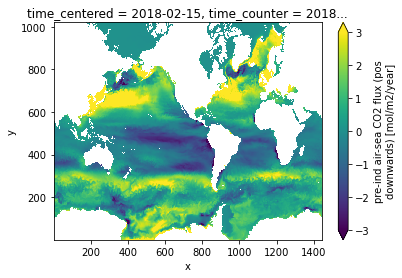

In [40]:
co2flux_pre.isel(y=slice(0,1020),time_counter=1).plot(vmin=-3,vmax=3)
#kw.isel(y=slice(0,500)).mean('time_counter').plot(vmin=1e-7,vmax=1e-4)

In [10]:
co2flux_pre

<xarray.DataArray 'co2flux_pre' (time_counter: 12, y: 1020, x: 1441)>
dask.array<getitem, shape=(12, 1020, 1441), dtype=float32, chunksize=(1, 100, 100), chunktype=numpy.ndarray>
Coordinates:
    nav_lat        (y, x) float32 -76.95 -76.95 -76.95 ... 50.02 50.0 50.0
    nav_lon        (y, x) float64 dask.array<chunksize=(99, 99), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2018-01-16T12:00:00 ... 2018...
  * x              (x) int64 1 2 3 4 5 6 7 ... 1436 1437 1438 1439 1440 1441
  * y              (y) int64 1 2 3 4 5 6 7 ... 1015 1016 1017 1018 1019 1020
Attributes:
    long_name:           pre-ind air-sea CO2 flux (pos downwards)
    units:               mol/m2/year
    online_operation:    average
    interval_operation:  1350 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 1350 s)

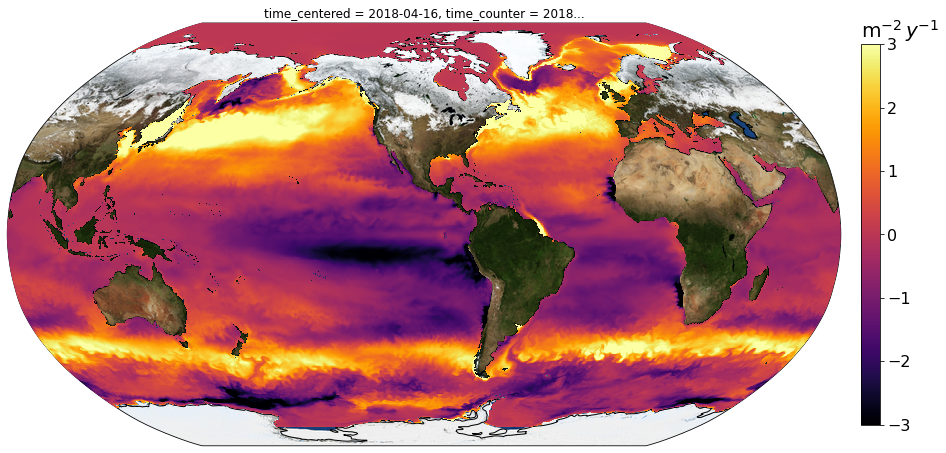

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,10), subplot_kw={'projection': ccrs.Robinson(central_longitude = -100)}, facecolor="none")
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,10), subplot_kw={'projection': ccrs.PlateCarree(central_longitude = -100)}, facecolor="none")

ax.imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=1000, zorder=1) 

map1 = co2flux_pre.isel(time_counter=3).plot(x='nav_lon', y='nav_lat', transform=ccrs.PlateCarree(), add_colorbar=False, ax=ax, 
                             zorder=3,vmin=-3,vmax=3,
                             cmap= 'inferno')

c = plt.colorbar(map1, pad=0.02, shrink=0.7, ax=ax)
c.ax.set_title('m$^{-2}\,y^{-1}$', loc='left', fontsize=20)
c.ax.tick_params(labelsize=16)
axes.Axes.tick_params(ax, axis='both' ,labelsize=16)
ax.coastlines()

# ax.add_feature(cfeature.LAND, color='oldlace', zorder=3)

#ax.set_title('(A) air-sea CO_2 flux', fontsize=20)

#savepath = '../figures/'
# plt.savefig(savepath + 'EKE_maps_ORION10_X_maskapplied.png', format='png', fa


#### Compute global integrals

In [19]:
co2flux_pre = xr.open_mfdataset(paths = sorted(glob(path + 'OR*1m*_mops.nc')), 
                                  chunks={"time_counter":1, "y":100, "x":100}).co2flux_pre


maskdir='/scratch/usr/shklvn09/NUDATA/ORCA/025-data/meshmask/mesh_mask.nc'
tmask = xr.open_dataset(maskdir,
                      chunks={"y":100, "x":100}).tmask.squeeze()
e1t = xr.open_dataset(maskdir,
                      chunks={"y":100, "x":100}).e1t.squeeze()
e2t = xr.open_dataset(maskdir,
                      chunks={"y":100, "x":100}).e2t.squeeze()

In [20]:
smask=tmask.isel(z=0)

In [21]:
co2fl_int = (co2flux_pre.where(smask) * e1t * e2t ).sum(('x','y')) 
areasum = ( tmask * e1t * e2t ).sum(('x','y')) 

In [22]:
co2fl_int.shape

(732,)

In [27]:
co2fl_yy = co2fl_int.groupby('time_counter.year').mean().compute()

In [24]:
co2fl_yy

<xarray.DataArray (year: 61)>
dask.array<stack, shape=(61,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 1958 1959 1960 1961 1962 ... 2014 2015 2016 2017 2018

#### Plotting

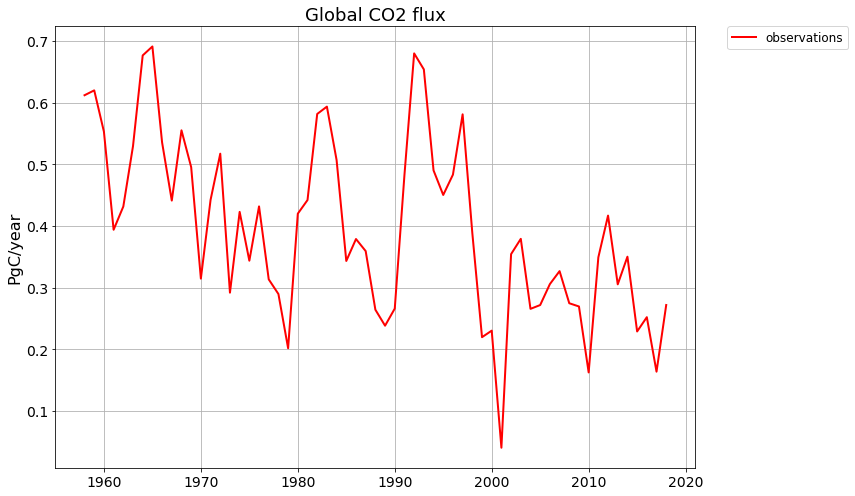

In [30]:
plt.figure(figsize=(12,7))
ax = plt.gca()
#ax.plot(np.arange(1958, 2019),co2fl_int*12.01/1e15, color='black', linewidth=2, label='model')
ax.plot(np.arange(1958, 2019),co2fl_yy*12.01/1e15, color='red', linewidth=2, label='observations')
# (co2fl_yy*12.01/1e15).plot()

ax.set_ylabel("PgC/year", fontsize = 16)
ax.set_title("Global CO2 flux", fontsize = 18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.Axes.tick_params(ax, axis='both' ,labelsize=14)
ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=12)


# locs, labels = plt.xticks()
# plt.xticks(np.arange(1958, 2018, step=10), rotation=25)

plt.tight_layout()

#savepath = '../figures/'
#plt.savefig(savepath + 'O2_ORCA05_lp0x.png', format='png', facecolor="w")

In [ ]:
plt.figure(figsize=(8,4))
ax = plt.gca()

co2fl_plot=co2fl.isel(time_counter=1)
    
ax = plt.axes(projection=ccrs.Miller(central_longitude=-100.0))

map1 = ax.pcolormesh(co2fl_plot)
    
c = plt.colorbar(map1, pad=0.02, shrink=0.7)
c.ax.set_title('$mol/m2/year$')

plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99)

In [25]:
co2fl_plot

<xarray.DataArray 'co2flux' (y: 511, x: 722)>
dask.array<getitem, shape=(511, 722), dtype=float32, chunksize=(100, 100), chunktype=numpy.ndarray>
Coordinates:
    nav_lat        (y, x) float32 dask.array<chunksize=(100, 100), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(100, 100), meta=np.ndarray>
    time_centered  datetime64[ns] dask.array<chunksize=(), meta=np.ndarray>
    time_counter   datetime64[ns] 1959-07-01T17:00:00
Dimensions without coordinates: y, x
Attributes:
    long_name:           air-sea CO2 flux (pos downwards)
    units:               mol/m2/year
    online_operation:    average
    interval_operation:  2160 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 2160 s) time_counter: mean